LÓGICA DIFUSA 

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [20]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [22]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [23]:
gorjeta

Consequent: gorjeta

MEMBERSHIP FUNCTION

In [24]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

In [25]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)

In [26]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [27]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [28]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [31]:
sistema.input['qualidade'] = 8
sistema.input['servico'] = 9
sistema.compute()

14.318368176197941


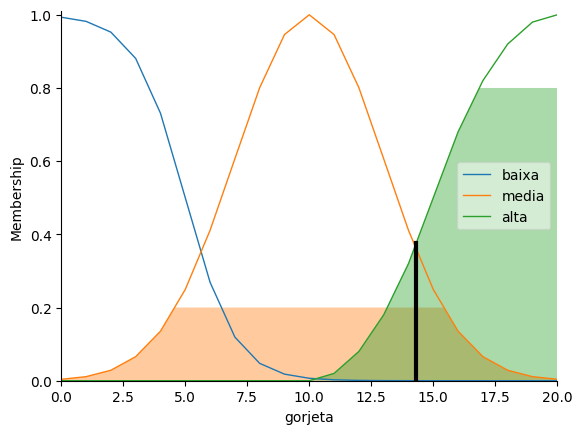

In [32]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)